In [367]:
# IMPORTING LIBRARIES

import numpy as np # for numerical computing
import pandas as pd # for dataframes
import seaborn as sns # for easier visualization
from matplotlib import pyplot as plt # for visualization and to display plots
from matplotlib.colors import ListedColormap # import color maps

In [369]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [371]:
# Reading the dataset and storing it in  variable 'OTT_Churn' 
data = pd.read_csv(r"D:\Amulya\Amulya VIT\Sem-7\TARP\Fertilizer Prediction data.csv")
# Printing the dataset
data

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [373]:
data.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [375]:
data['Soil Type']=data['Soil Type'].map({'Loamy':0,'Sandy':1,'Clayey':2,'Black':3,'Red':4})

In [377]:
map2={'Sugarcane':0,'Cotton':1, 'Millets':2, 'Paddy':3, 'Pulses':4, 'Wheat':5, 'Tobacco':6, 'Barley':7,'Oil seeds':8,'Ground Nuts':9, 'Maize':10 }
data['Crop Type']=data['Crop Type'].map(map2)

In [379]:
data['Fertilizer Name']=data['Fertilizer Name'].map({'Urea':0,'DAP':1,'28-28':2,'14-35-14':3,'20-20':4,'17-17-17':5,'10-26-26':6})

In [381]:
#Splitting out training data into X: features and Y: target
X = data.drop("Fertilizer Name",axis=1) 
Y = data["Fertilizer Name"]

In [383]:
# Importing library
from sklearn.preprocessing import StandardScaler

In [385]:
sc=StandardScaler()
sc=sc.fit(X)
X=sc.transform(X)

In [387]:
# Splitting of training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=60)

In [389]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)

In [391]:
# Accuracy of Logistic Regression
acc_logreg = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_logreg

82.5

In [393]:
# let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,Y,cv=5) 
np.mean(cv_scores)*100

96.0

In [395]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)
print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  82.5 %


[[ 9  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  1  0  3  0  0]
 [ 0  0  0  0  0  1  1]
 [ 0  0  0  1  0  4  0]]


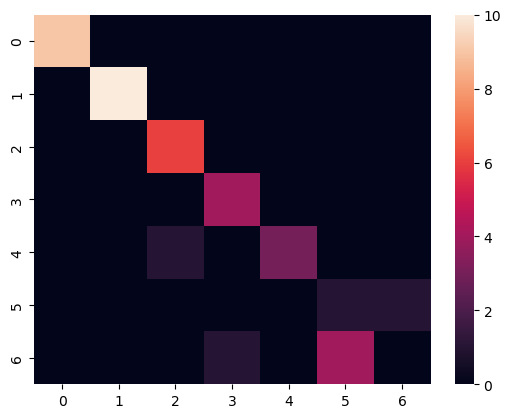

In [397]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [399]:
# Performance metrics 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92         6
           3       0.80      1.00      0.89         4
           4       1.00      0.75      0.86         4
           5       0.20      0.50      0.29         2
           6       0.00      0.00      0.00         5

    accuracy                           0.82        40
   macro avg       0.69      0.75      0.71        40
weighted avg       0.79      0.82      0.80        40



In [401]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

Scores = {
    'Accuracy': round(accuracy_score(Y_test, Y_pred), 3),
    'F1_score': round(f1_score(Y_test, Y_pred, average='weighted'), 3),
    'Recall': round(recall_score(Y_test, Y_pred, average='weighted'), 3),
    'Precision': round(precision_score(Y_test, Y_pred, average='weighted'), 3),
}
Scores
model_logreg=pd.DataFrame(data=Scores,index=['Logistic_regression'])
model_logreg

,Accuracy,F1_score,Recall,Precision
Logistic_regression,0.825,0.802,0.825,0.794


In [403]:
#Decision Tree Classifier
# Grid Search CV
decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, Y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 6}
Best score: 98.00000000000001


In [405]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.95


In [407]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  95.0 %


[[ 9  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  3  0  1  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  4]]


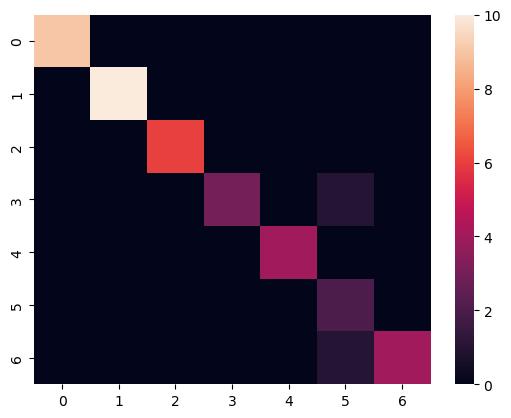

In [409]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [411]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         2
           6       1.00      0.80      0.89         5

    accuracy                           0.95        40
   macro avg       0.93      0.94      0.92        40
weighted avg       0.97      0.95      0.96        40



In [413]:
Scores = {
    'Accuracy': round(accuracy_score(Y_test, Y_pred), 3),
    'F1_score': round(f1_score(Y_test, Y_pred, average='weighted'), 3),
    'Recall': round(recall_score(Y_test, Y_pred, average='weighted'), 3),
    'Precision': round(precision_score(Y_test, Y_pred, average='weighted'), 3),
}
Scores

model_decisiontree=pd.DataFrame(data=Scores,index=['Decision_Tree_Classifier'])
model_decisiontree

,Accuracy,F1_score,Recall,Precision
Decision_Tree_Classifier,0.95,0.955,0.95,0.975


In [415]:
#Random Forest Classifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, Y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 11}
Best score: 98.00000000000001


In [416]:
classifier = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)

In [417]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  87.5 %


[[ 9  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  1  2  0  2  0]]


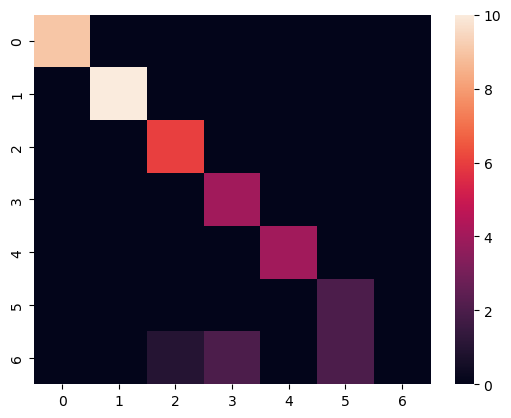

In [421]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [423]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92         6
           3       0.67      1.00      0.80         4
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         2
           6       0.00      0.00      0.00         5

    accuracy                           0.88        40
   macro avg       0.72      0.86      0.77        40
weighted avg       0.80      0.88      0.83        40



In [425]:
Scores = {
    'Accuracy': round(accuracy_score(Y_test, Y_pred), 3),
    'F1_score': round(f1_score(Y_test, Y_pred, average='weighted'), 3),
    'Recall': round(recall_score(Y_test, Y_pred, average='weighted'), 3),
    'Precision': round(precision_score(Y_test, Y_pred, average='weighted'), 3),
}
Scores
model_randomforest=pd.DataFrame(data=Scores,index=['Random_Forest'])
model_randomforest

,Accuracy,F1_score,Recall,Precision
Random_Forest,0.875,0.827,0.875,0.795


In [427]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
  
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)

In [429]:
#Accuracy of KNN
acc_knn = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_knn

62.5

[[ 9  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  1  2  0  2  0]]


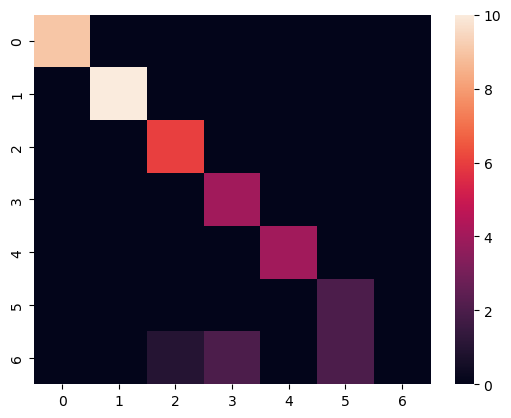

In [431]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [433]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.78      0.70      0.74        10
           2       0.60      1.00      0.75         6
           3       0.25      0.50      0.33         4
           4       0.50      0.50      0.50         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5

    accuracy                           0.62        40
   macro avg       0.45      0.51      0.47        40
weighted avg       0.58      0.62      0.59        40



In [435]:
Scores = {
    'Accuracy': round(accuracy_score(Y_test, Y_pred), 3),
    'F1_score': round(f1_score(Y_test, Y_pred, average='weighted'), 3),
    'Recall': round(recall_score(Y_test, Y_pred, average='weighted'), 3),
    'Precision': round(precision_score(Y_test, Y_pred, average='weighted'), 3),
}
Scores
model_KNN=pd.DataFrame(data=Scores,index=['KNN_Classifier'])
model_KNN

,Accuracy,F1_score,Recall,Precision
KNN_Classifier,0.625,0.592,0.625,0.584


In [437]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [439]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  90.0 %


[[ 9  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  2]
 [ 0  0  0  0  0  2  3]]


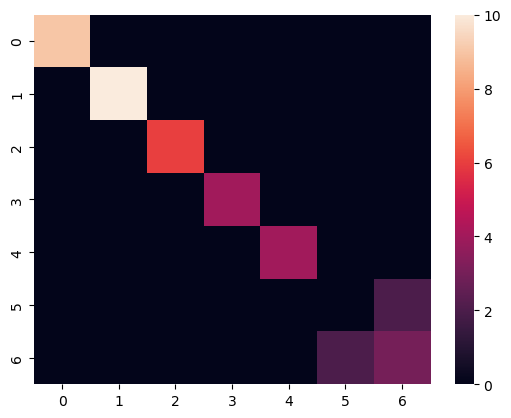

In [441]:
# Confusion Matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [443]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         2
           6       0.60      0.60      0.60         5

    accuracy                           0.90        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.90      0.90      0.90        40



In [445]:
Scores = {
    'Accuracy': round(accuracy_score(Y_test, Y_pred), 3),
    'F1_score': round(f1_score(Y_test, Y_pred, average='weighted'), 3),
    'Recall': round(recall_score(Y_test, Y_pred, average='weighted'), 3),
    'Precision': round(precision_score(Y_test, Y_pred, average='weighted'), 3),
}
model_svm=pd.DataFrame(data=Scores,index=['Support_Vector_Machine'])
model_svm

,Accuracy,F1_score,Recall,Precision
Support_Vector_Machine,0.9,0.9,0.9,0.9


In [447]:
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, Y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 1, 'n_estimators': 6}
Best score: 99.0


In [448]:
classifier=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)

In [451]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  95.0 %


[[ 9  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  3  0  1  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  4]]


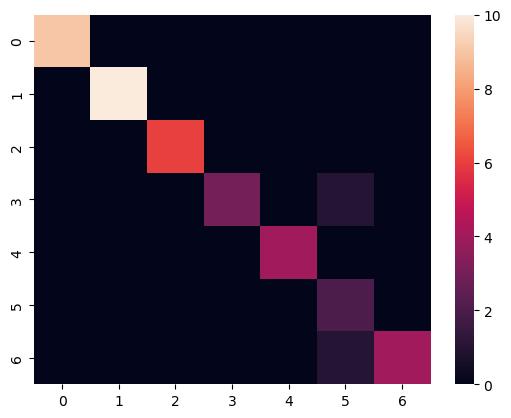

In [453]:
# Confusion Matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [455]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         2
           6       1.00      0.80      0.89         5

    accuracy                           0.95        40
   macro avg       0.93      0.94      0.92        40
weighted avg       0.97      0.95      0.96        40



In [457]:
Scores = {
    'Accuracy': round(accuracy_score(Y_test, Y_pred), 3),
    'F1_score': round(f1_score(Y_test, Y_pred, average='weighted'), 3),
    'Recall': round(recall_score(Y_test, Y_pred, average='weighted'), 3),
    'Precision': round(precision_score(Y_test, Y_pred, average='weighted'), 3),
}
model_gradientboost=pd.DataFrame(data=Scores,index=['Gradient_Boosting'])
model_gradientboost

,Accuracy,F1_score,Recall,Precision
Gradient_Boosting,0.95,0.955,0.95,0.975


In [459]:
All_Models = pd.concat([model_logreg,model_decisiontree,model_randomforest,model_KNN,model_svm,model_gradientboost],axis = 0)
All_Models

,Accuracy,F1_score,Recall,Precision
Logistic_regression,0.825,0.802,0.825,0.794
Decision_Tree_Classifier,0.950,0.955,0.950,0.975
Random_Forest,0.875,0.827,0.875,0.795
KNN_Classifier,0.625,0.592,0.625,0.584
Support_Vector_Machine,0.900,0.900,0.900,0.900
Gradient_Boosting,0.950,0.955,0.950,0.975


In [461]:
Sort_Models = All_Models.sort_values(by=['Accuracy'],ascending = False)
Sort_Models

,Accuracy,F1_score,Recall,Precision
Decision_Tree_Classifier,0.950,0.955,0.950,0.975
Gradient_Boosting,0.950,0.955,0.950,0.975
Support_Vector_Machine,0.900,0.900,0.900,0.900
Random_Forest,0.875,0.827,0.875,0.795
Logistic_regression,0.825,0.802,0.825,0.794
KNN_Classifier,0.625,0.592,0.625,0.584


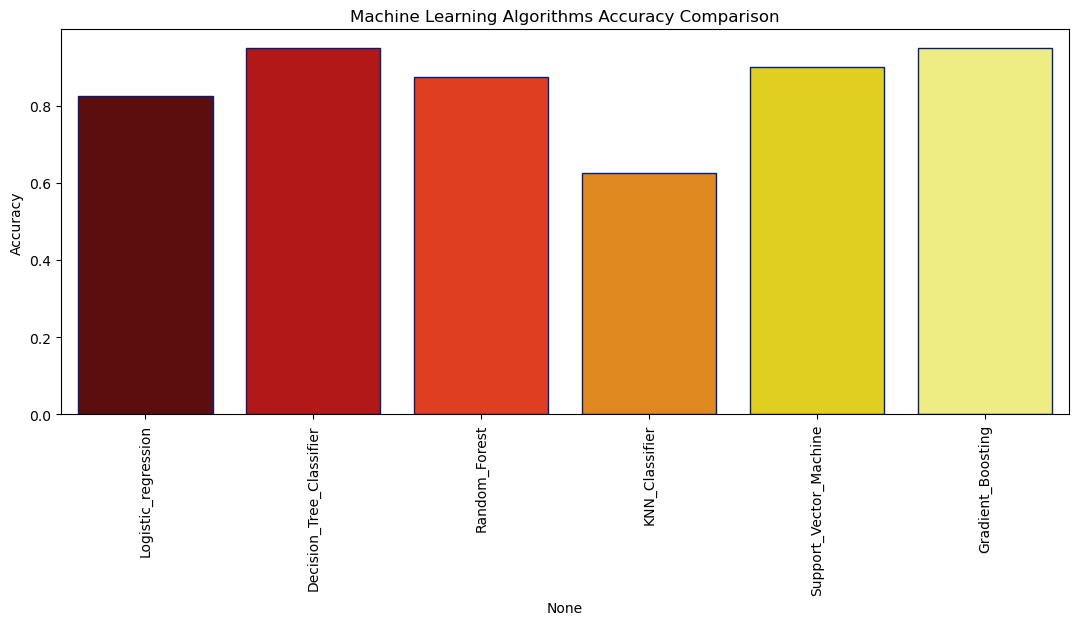

In [463]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_Models.index , y="Accuracy",data=All_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Accuracy Comparison')
plt.show()

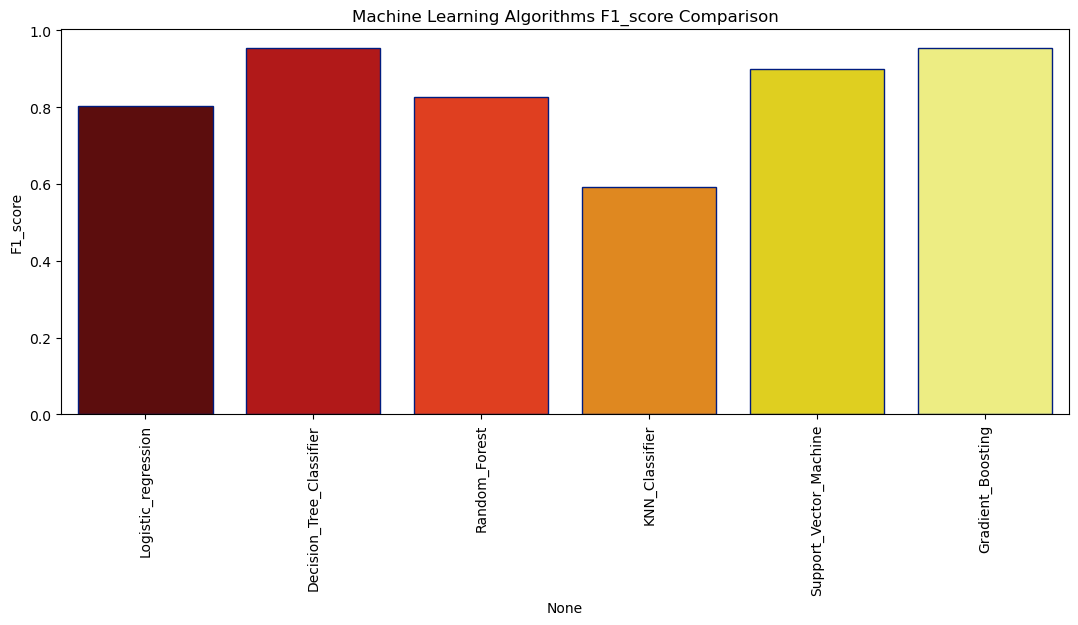

In [465]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_Models.index , y="F1_score",data=All_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms F1_score Comparison')
plt.show()

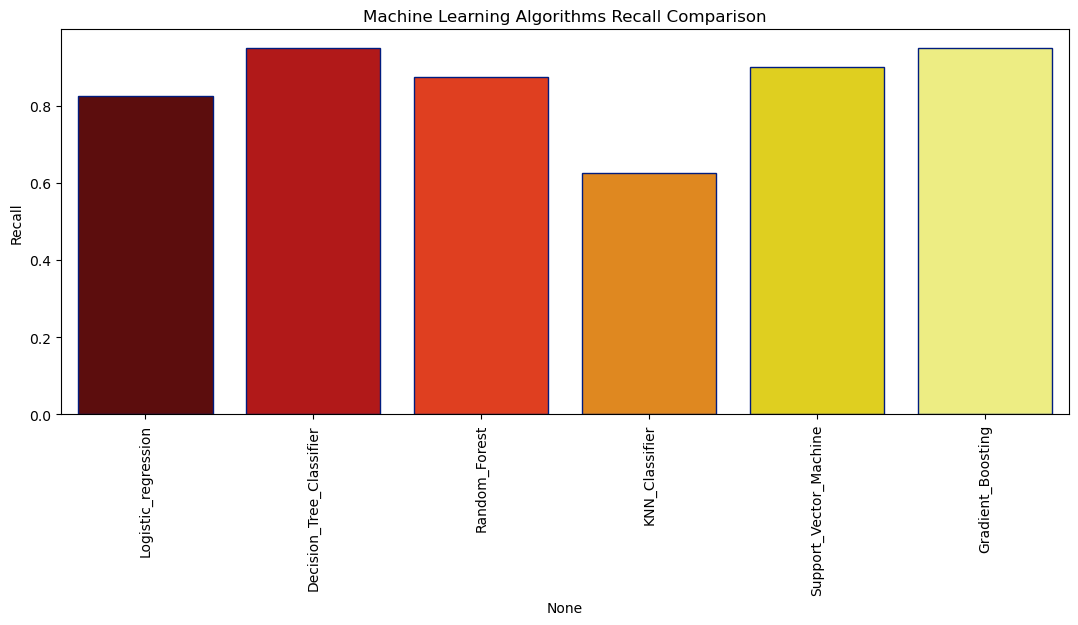

In [467]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_Models.index , y="Recall",data=All_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Recall Comparison')
plt.show()

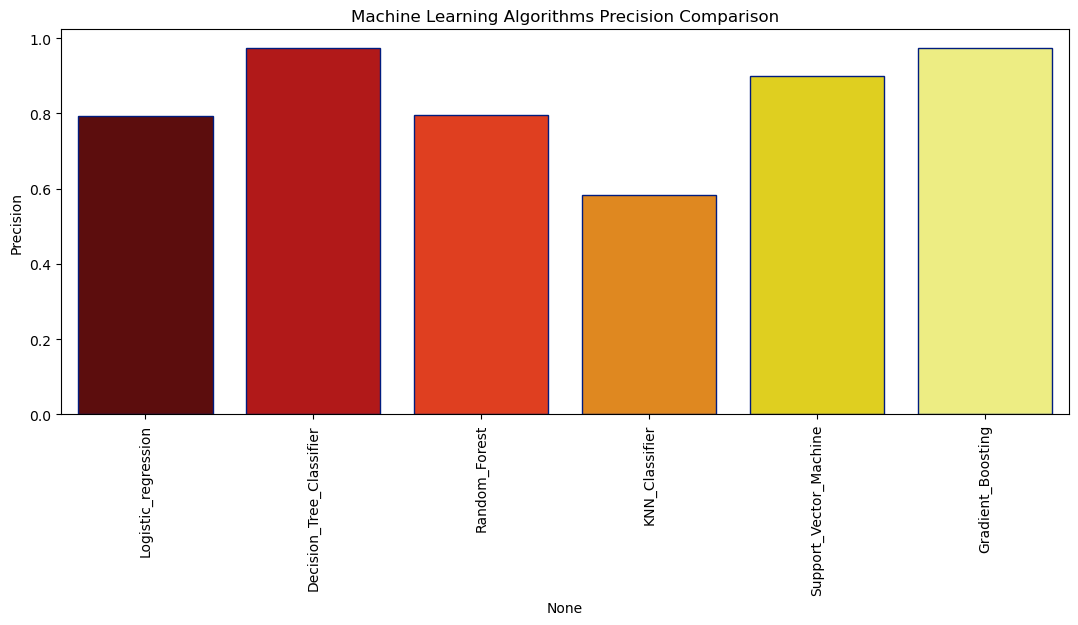

In [469]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_Models.index , y="Precision",data=All_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Precision Comparison')
plt.show()